# Minimal derrom example

This notebook presents a minimal example for derroms autoregression mode. 

### Setup the notebook

Import numpy and matplotlib for data manipulation and visualization.

Use derrom.utils to load the trajectories.


In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

data_path = "../../../data/"
derrom_path = "../../"

import sys

# sys.path.append(derrom_path)
sys.path.insert(0,derrom_path)

import derrom

In [2]:
### use this code to load the paper dataset with n_kmax = 200 and n = 1000 - generated by the >> ELPH_data_simulate_paper_training_testing_example << notebook

trajectories = derrom.utils.load_trajectories(filename=data_path + 'trajectories_n_kmax=200.npz')

trajectories = trajectories[::10]

n_trajectories = len(trajectories)
n_kmax = trajectories[0].shape[1]

print(n_trajectories, 'loaded with n_kmax =', n_kmax)


test_trajectory = derrom.utils.load_trajectories(filename=data_path + 'example_trajectory.npz')[0]
print('example trajectory loaded with shape: ', test_trajectory.shape)

100 loaded with n_kmax = 200
example trajectory loaded with shape:  (400, 200)


In [2]:
### use this code to load the dataset with n_kmax = 40 and n = 100 - generated by the >> ELPH_data_simulate_low_res << notebook

trajectories = derrom.utils.load_trajectories(filename=data_path + 'ELPH_trajectories_n_kmax=40.npz')

n_trajectories = len(trajectories)
n_kmax = trajectories[0].shape[1]

print(n_trajectories, 'loaded with n_kmax =', n_kmax)

test_trajectory = derrom.utils.load_trajectories(filename=data_path + 'ELPH_example_trajectory_nkmax40.npz')[0]
print('example trajectory loaded with shape: ', test_trajectory.shape)

100 loaded with n_kmax = 40
example trajectory loaded with shape:  (400, 40)


### Derrom estimator

Create derrom and specify all relevant parameters and moduls.

Fit the model with the previously loaded trajectories. The keyword 'AR' invokes the autoregression mode.

In [3]:
model = derrom.estimator(rdim=15, DE_l=2, intercept=True, full_hist=False,
                    optimizer=derrom.optimizers.ridge(alpha=10.**-3.0),
                    scaler=derrom.scalers.standardize_scaler(1.0),
                    dim_reducer=derrom.dim_reducers.SVD(),
                    NL_transformer=derrom.transformers.ELM_features(ELM_nodes=400))

model.fit(trajectories, targets='AR')

model.print_status()


full_hist:  False
intercept:  True
standardize:  True
rdim:  15
DE_l:  2
weights shape:  (431, 15)


### Test the model

Use the test trajectory to test the trained model and score the prediction against the truth.

In [4]:
pred = model.predict(test_trajectory)

print('rms error: ', model.get_error(test_trajectory, pred=pred, norm='rms') )
print('max error: ', model.get_error(test_trajectory, pred=pred, norm='max') )

rms error:  0.012028258140182496
max error:  0.07141397055741341


### Visualize the prediction

Use the derrom.utils functions for easy plotting

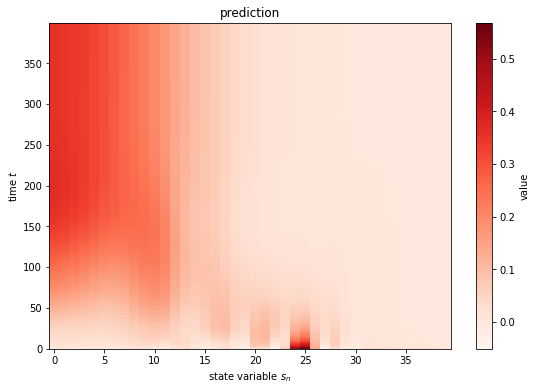

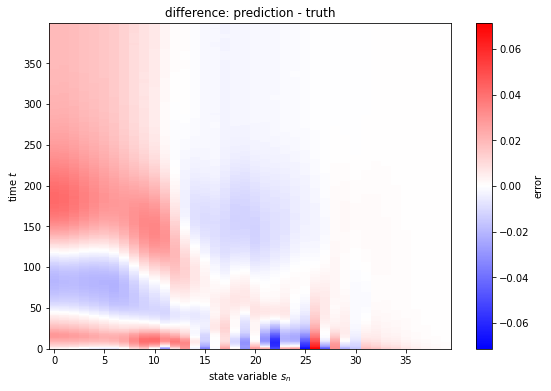

In [5]:

derrom.utils.plot_trajectory(pred, 'prediction')

derrom.utils.plot_difference(pred, test_trajectory, 'difference: prediction - truth')